In [ ]:
print("Hi")

Hi


In [ ]:
import os
import pandas as pd
import numpy as np


In [ ]:
!pwd

/content/sample_data


In [ ]:
import os
# os.chdir('./sample_data')


In [ ]:
dataset = pd.read_csv('./coin_Bitcoin.csv')
dataset[:12]

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09
5,6,Bitcoin,BTC,2013-05-04 23:59:59,115.000000,92.500000,98.099998,112.500000,0.0,1.250317e+09
6,7,Bitcoin,BTC,2013-05-05 23:59:59,118.800003,107.142998,112.900002,115.910004,0.0,1.288693e+09
7,8,Bitcoin,BTC,2013-05-06 23:59:59,124.663002,106.639999,115.980003,112.300003,0.0,1.249023e+09
8,9,Bitcoin,BTC,2013-05-07 23:59:59,113.444000,97.699997,112.250000,111.500000,0.0,1.240594e+09
9,10,Bitcoin,BTC,2013-05-08 23:59:59,115.779999,109.599998,109.599998,113.566002,0.0,1.264049e+09


<Axes: >

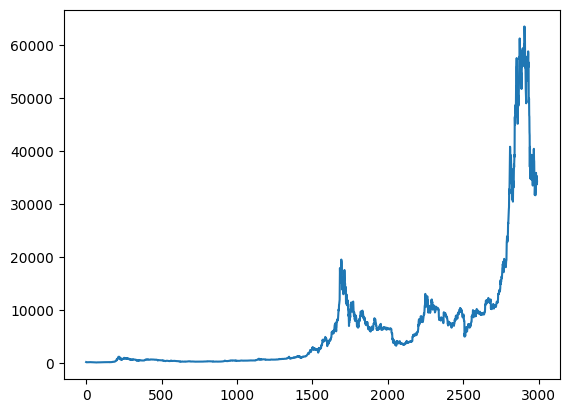

In [ ]:
close_price = dataset['Close']
close_price.plot()

In [ ]:
#  [[[1], [2], [3], [4], [5]]], [6]

def create_X_Y(close_price, window_size=5):

  X = []
  y = []

  for i in range(len(close_price) - window_size):
    row = [[a] for a in close_price[i:i+window_size]]
    X.append(row)

    y.append(close_price[i + window_size])

  return np.array(X), np.array(y)



In [ ]:
WINDOW_SIZE = 10
X, Y = create_X_Y(close_price, WINDOW_SIZE)

X[:2], Y[:2]

(array([[[144.53999329],
         [139.        ],
         [116.98999786],
         [105.20999908],
         [ 97.75      ],
         [112.5       ],
         [115.91000366],
         [112.30000305],
         [111.5       ],
         [113.56600189]],
 
        [[139.        ],
         [116.98999786],
         [105.20999908],
         [ 97.75      ],
         [112.5       ],
         [115.91000366],
         [112.30000305],
         [111.5       ],
         [113.56600189],
         [112.66999817]]]),
 array([112.66999817, 117.19999695]))

In [ ]:
X_train, X_val, X_test = X[:2400], X[2400:2700], X[2700:]
Y_train, Y_val, Y_test = Y[:2400], Y[2400:2700], Y[2700:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError


In [ ]:
model = Sequential()
model.add(InputLayer((WINDOW_SIZE, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear')) # anothe activation function seems better
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

cp = ModelCheckpoint('model/' ,save_best_only=True)
model.compile(optimizer=Adam(learning_rate=0.003), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [ ]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, callbacks=[cp])

Epoch 1/10
75/75 [==============================] - 6s 50ms/step - loss: 23424848.0000 - root_mean_squared_error: 4839.9224 - val_loss: 83432928.0000 - val_root_mean_squared_error: 9134.1631
Epoch 2/10
75/75 [==============================] - 4s 56ms/step - loss: 23270194.0000 - root_mean_squared_error: 4823.9189 - val_loss: 82727360.0000 - val_root_mean_squared_error: 9095.4580
Epoch 3/10
75/75 [==============================] - 3s 44ms/step - loss: 22965942.0000 - root_mean_squared_error: 4792.2793 - val_loss: 81572320.0000 - val_root_mean_squared_error: 9031.7393
Epoch 4/10
75/75 [==============================] - 3s 42ms/step - loss: 22520686.0000 - root_mean_squared_error: 4745.5967 - val_loss: 80035000.0000 - val_root_mean_squared_error: 8946.2285
Epoch 5/10
75/75 [==============================] - 4s 60ms/step - loss: 21967386.0000 - root_mean_squared_error: 4686.9380 - val_loss: 78132896.0000 - val_root_mean_squared_error: 8839.2812
Epoch 6/10
75/75 [===========================